# Guía 2 - Árboles de Decisión

En este notebook trabajaremos con uno de los modelos más difundidos para Aprendizaje Supervisado, Árboles de Decisión. El notebook está dividido en tres partes: 

1. Construcción de un árbol de decisión *a mano*.
1. Titanic + Árboles de Decisión en Scikit-Learn.
1. Árboles de Decisión en profundidad.
1. Extras.

## 1. Construcción de un árbol de decisión *a mano* (Opcional)

Es raro que, como Científico de Datos, tengas que programar un modelo, al menos en esta etapa de tu carrera. Como ya sabrás, existen muchas librerías con implementaciones de diferente métodos al alcance de la mano. Sin embargo, hacer una implementación rápida, aunque sea sencilla, ayuda comprender mejor algunos detalles. 

En esta sección vamos a programar **la consulta** de un árbol de decisión. Todo esto lo implementa Scikit-Learn de forma automática, pero hacerlo te ayudará a comprender mejor los árboles de decisión.

Probablemente ya te hayas topado con el dataset de Titanic. Sino, puedes mirarlos en la siguiente competencia Kaggle [Machine Learning from Disaster](https://www.kaggle.com/c/titanic). En la descarga te dejamos una versión simplificada y filtrada de este dataset. Qué representa cada atributo puedes mirarlo en la página de Kaggle, pero te aclaramos que la columna `Sex` refiere al género, donde `0` es hombre y `1` es mujer.

**Ejercicio:** Carga el dataset de Titanic y tomate unos minutos para estudiar o recordar sus características. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

df = pd.read_csv("../../datasets/IAA_Guia_6_Titanic.csv")

In [2]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


<Axes: xlabel='Sex', ylabel='Age'>

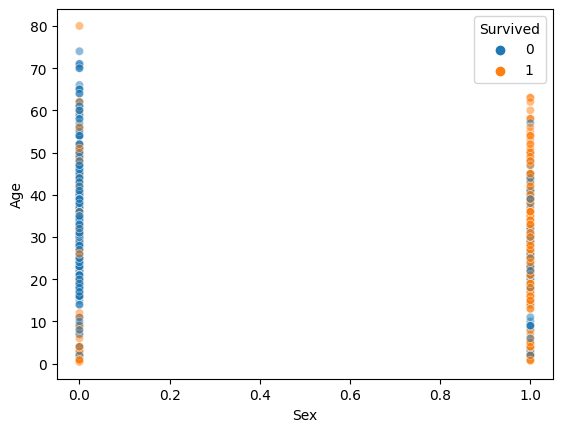

In [3]:
sns.scatterplot(x='Sex', y='Age', hue='Survived', data=df, alpha=0.5)

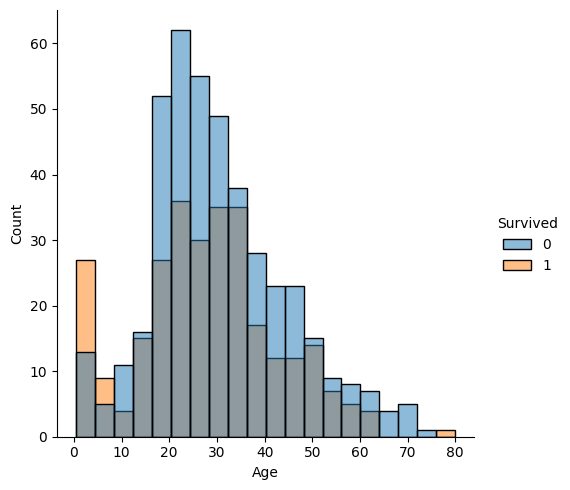

In [4]:
sns.displot(x='Age', hue='Survived', data=df)

### 1.1 Árbol de decisión *a mano*

Ahora sí, manos a la obra.

**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

En primer lugar, vamos a definir algunas funciones que serán de utilidad.

* La función `accuracy`, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienes que modificar, pero presta atención a su implementación**.

In [5]:
def accuracy(y_predicted, y_real):
    mask = np.array(y_predicted) == np.array(y_real)
    return mask.sum()/len(y_real)

* La función `predict_instance`, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrás que modificar**.

In [6]:
def predict_instance(x):
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0 # cambiar
    
    ### UNA POSIBLE FORMA DE EMPEZAR:
#     if x.Age < 12:
#         prediction = 1
#     else:
#         prediction = 0
#     # FIN DE COMPLETAR
    
    return prediction

* Por último, la función `predict` toma todo las instancias `X` y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienes que modificar, pero presta atención a su implementación**.

In [7]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

**Consigna**

1. Cargar el dataset de Titanic y separar en una variable `X` los atributos que usarás para predecir, y en una variable `y` la etiqueta que quieres predecir. En este caso, si sobrevivió o no.

In [8]:
X = df.drop("Survived", axis=1)
y = df.Survived

2. Usar los datos `X` para predecir si los pasajeros sobrevivieron o no utilizando la función `predict`. **No tienes que modificar ninguna de las funciones por ahora**.

In [9]:
y_pred = predict(X)
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

3. Calcula la medida de performance entre las etiquetas reales `y` y las etiquetas predichas `y_pred` con la función `accuracy`.

In [10]:
print("Accuracy final: ", round(accuracy(y_pred, y), 3))

Accuracy final:  0.594


4. Calcula la matriz de confusión con Scikit-Learn.

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[424,   0],
       [290,   0]], dtype=int64)

**Ejercicio**: modifica `predict_instance` de forma tal de mejorar el resultado recién obtenido. Tal vez te sirva de pista, para arrancar, la famosa frase, "mujeres y niños primero".

**Para pensar:** las performances asociadas a predecir todos `0` (nadie sobrevivió), todos `1` (todos sobrevivieron), y predecir al azar son muy importantes para evaluar nuestro trabajo. ¿Por qué?

## 2. Árboles de Decisión en Scikit-Learn + Titanic

Entrena un árbol de decisión de Scikit-Learn en el dataset de Titanic. Algunas recomendaciones:

1. Arranca con `max_depth = 2` y fija el `random_state`. Visualiza el árbol obtenido con la función `plot_tree` del módulo `tree` de Scikit-Learn.
1. Evalúa su desempeño calculando la exactitud y viendo su matriz de confusión.
1. Observa la importancia asignada a cada atributo (`feature_importances_`).
1. Si seleccionas dos atributos, pueden observar las fronteras de decisión con código de notebooks anteriores (o luego en este notebook).

¿Te parece que lo obtenido concuerda con lo que esperabas?¿Qué puedes aprender de la tragedia del Titanic viendo el árbol de decisíon y la importancia de cada atributo (feature)?

In [12]:
# Creamos un objeto arbol
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
X = df.drop("Survived", axis=1)
y = df.Survived
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'x[2] <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]'),
 Text(0.75, 0.5, 'x[0] <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]')]

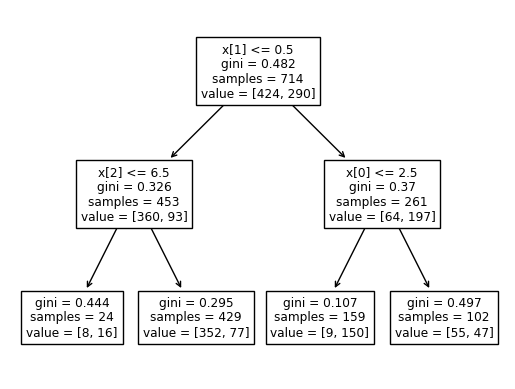

In [13]:
tree.plot_tree(clf)

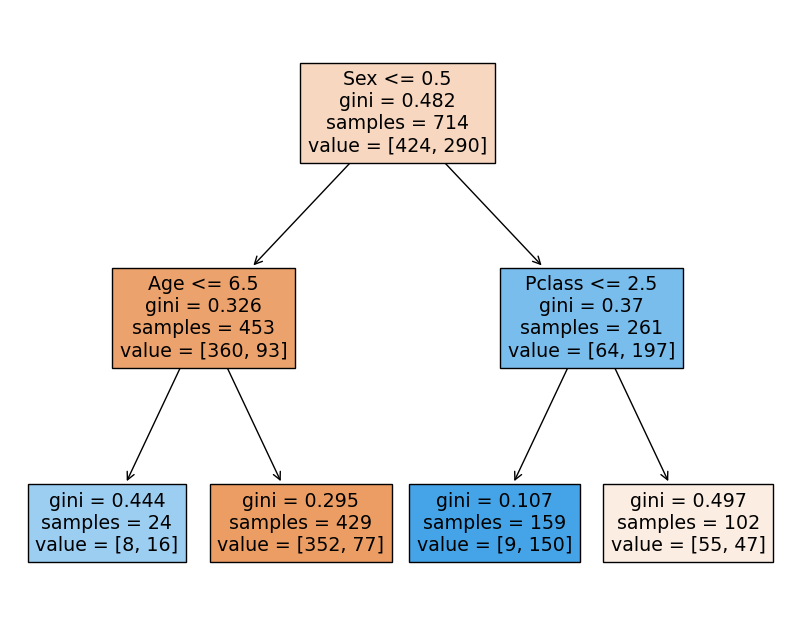

In [14]:
plt.figure(figsize = (10,8))
tree.plot_tree(clf, filled = True, feature_names= X.columns)
plt.show()

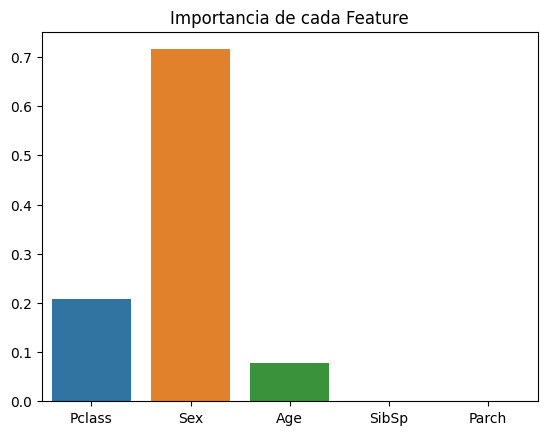

In [15]:
importances = clf.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature')
plt.show()

## 3. En profundidad


En esta sección del notebook vamos a profundizar en algunas características de los árboles de decisión. En particular, estudiaremos cómo son las fronteras de decisión para un Árbol de Decisión y veremos cómo controlar el sobreajuste.

Para ilustrar mejor los conceptos, vamos a recurrir a un dataset sintético de dos clases. Esto facilitará el proceso y nos permitirá visualizar algunos resultados. También dejamos algunas funciones que pueden ser útiles.

In [16]:
def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=2)

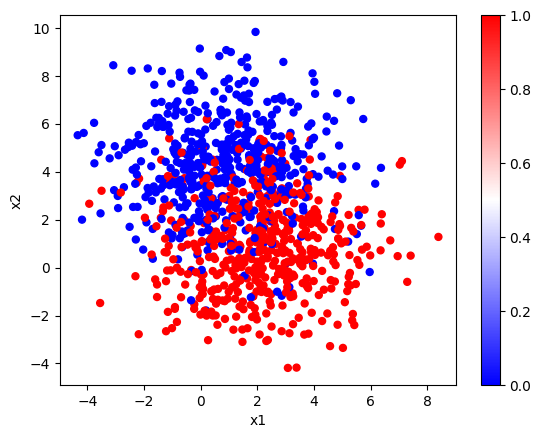

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Para pensar:** observa el gráfico obtenido y evalúa si, dada únicamente los atributos del gráfico, es posible obtener un clasificador perfecto (exactitud 1).


**Train-test split**

Hasta ahora lo hemos omitido, pero vamos a hacer un `train_test_split` de los datos.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

### 3.1 Sobreajuste y Regularización


**Ejercicio:** 

1. Observa y familiarizate con los argumentos de un `DecisionTreeClassifier`. Presta particular atención a `max_depth`.
1. Por defecto, un `DecisionTreeClassifier` de Scikit-Learn no tiene regularización. El árbol va a crecer hasta que consiga una perfecta separación de clases. Entonces, entrena un Árbol de Decisión sin ningún tipo de regularización. Para ello, utiliza los argumentos por defecto.
1. Evalúalo en train y test, y grafica las fronteras de decisión usando la función `visualize_classifier`. ¿Qué te parece que puedes decir sobre estas fronteras?¿Te parece que hay sobreajuste?
1. Grafica el árbol usando la función `plot_tree`. ¿Alguna señal de alerta?

**Ejercicio:** Entrena los modelo, pero ahora poniendo valores predeterminados en `max_depth`. Por ejemplo, 1, 3 y 5. ¿Puedes decir algo sobre el desempeño en train y test?¿Y sobre las fronteras?

**Ejercicio:** Haz un gráfico de desempeño en train y test en función de `max_depth`. Interpreta.


**Ejercicio:** Hay muchas formas de controlar el sobreajuste en un árbol de decisión. Leé en la documentación qué hacen los siguientes argumentos:
* `max_depth`
* `min_samples_split`
* `min_samples_leaf` 
* `max_leaf_nodes`   
* `min_impurity_decrease`

Luego:
* Elije al menos tres de esos hiperparámetros
* Entrena árboles de decisión para distintas combinaciones de valores de esos hiperparámetros. 
* Visualice los árboles resultantes y la frontera de decisión para obtener información sobre el procedimiento de regularización.

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

C:\Users\javic\AppData\Local\Temp\ipykernel_16804\3773534933.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


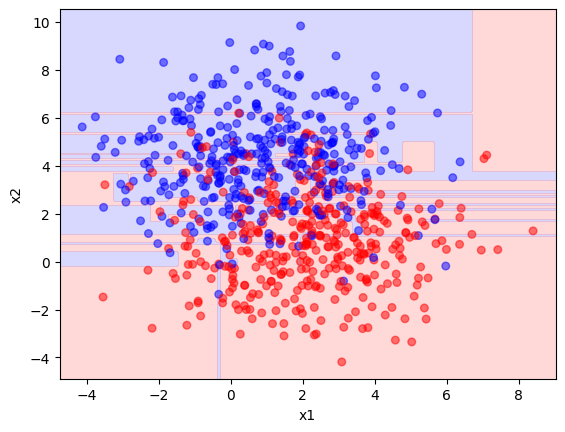

In [22]:
visualize_classifier(clf, X_train, y_train, ax=None, cmap='bwr')    

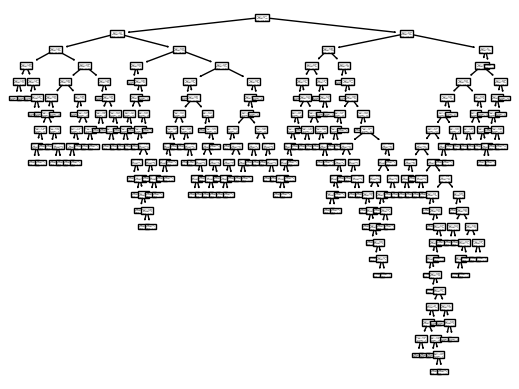

In [23]:
tree.plot_tree(clf)
plt.show()

In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_test, y_test)

DecisionTreeClassifier()

C:\Users\javic\AppData\Local\Temp\ipykernel_16804\3773534933.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


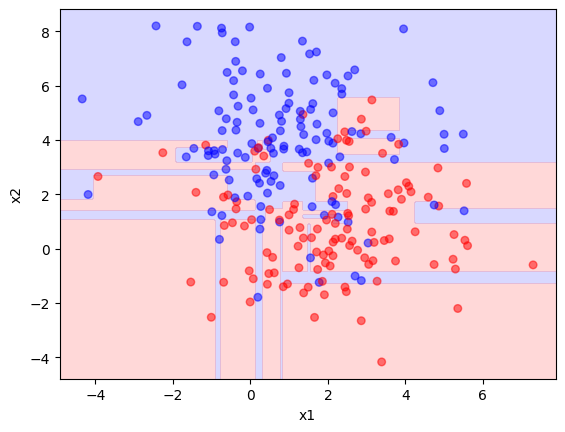

In [25]:
visualize_classifier(clf, X_test, y_test, ax=None, cmap='bwr')

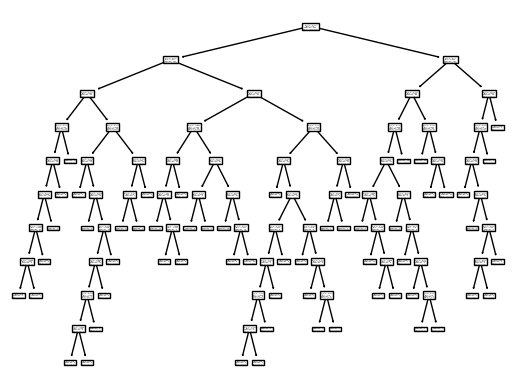

In [26]:
tree.plot_tree(clf)
plt.show()

In [27]:
max_depths = np.arange(1,20)
acc_train = []
acc_test = []
for md in max_depths:
    clf = DecisionTreeClassifier(max_depth=md)
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    
    clf = DecisionTreeClassifier(max_depth=md)
    clf = clf.fit(X_test, y_test)
    y_pred_test = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred_test))

print('acc_train', acc_train)
print('acc_test', acc_test)

acc_train [0.8173333333333334, 0.8173333333333334, 0.8466666666666667, 0.848, 0.8653333333333333, 0.8813333333333333, 0.9, 0.9253333333333333, 0.944, 0.956, 0.9693333333333334, 0.9773333333333334, 0.9853333333333333, 0.988, 0.9906666666666667, 0.9933333333333333, 0.9946666666666667, 0.9946666666666667, 0.996]
acc_test [0.792, 0.792, 0.832, 0.852, 0.884, 0.924, 0.952, 0.976, 0.992, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


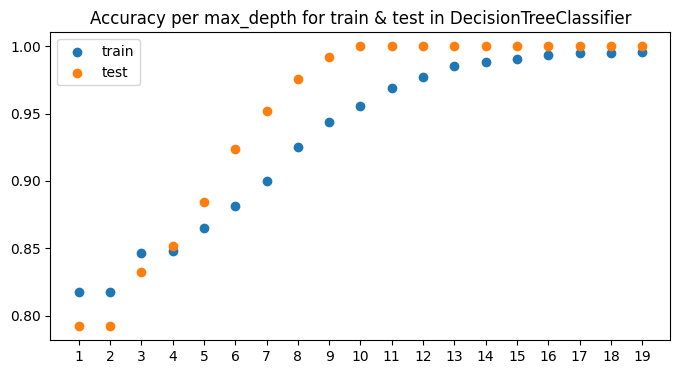

In [28]:
plt.figure(figsize=(8, 4))
plt.scatter(x=max_depths, y=acc_train, label='train')
plt.scatter(x=max_depths, y=acc_test, label='test')
plt.xticks(max_depths)
plt.legend()
plt.title('Accuracy per max_depth for train & test in DecisionTreeClassifier');

acc_train [0.8173333333333334, 0.8173333333333334, 0.844, 0.8453333333333334, 0.856, 0.8626666666666667, 0.8653333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333, 0.8693333333333333]
acc_test [0.792, 0.792, 0.832, 0.848, 0.872, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876, 0.876]


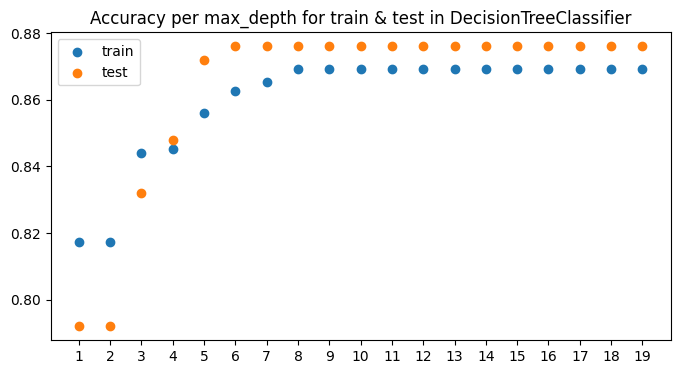

In [29]:
max_depths = np.arange(1,20)
acc_train = []
acc_test = []
for md in max_depths:
    clf = DecisionTreeClassifier(max_depth=md, max_leaf_nodes=20, min_samples_split=4, min_samples_leaf=4)
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    
    clf = DecisionTreeClassifier(max_depth=md, max_leaf_nodes=20, min_samples_split=4, min_samples_leaf=4)
    clf = clf.fit(X_test, y_test)
    y_pred_test = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred_test))

print('acc_train', acc_train)
print('acc_test', acc_test)

plt.figure(figsize=(8, 4))
plt.scatter(x=max_depths, y=acc_train, label='train')
plt.scatter(x=max_depths, y=acc_test, label='test')
plt.xticks(max_depths)
plt.legend()
plt.title('Accuracy per max_depth for train & test in DecisionTreeClassifier');

### 3.2 Fronteras de decisión cartesianas

Si observaste atentamente las fronteras obtenidas por los árboles de decisión, tal vez te llamó la atención cierta característica. Un árbol puede, en principio, aproximar cualquier frontera entre clases. Pero cada división es obtenida sobre un atributo a la vez, por lo que esto se traduce en fronteras con segmentos verticales u horizontales. Entonces, la el resultado está fuertemente influencia por la orientación de los atributos. Veámoslo con un ejemplo.


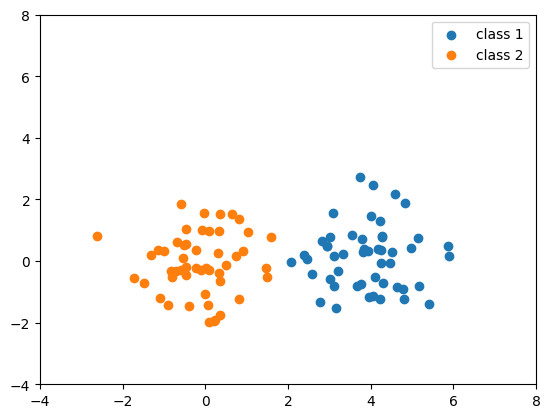

In [37]:
#First class: 250 points that follow a bi-normal distribution
size1 = 50
mu1 = [0, 0]
cov1 = [[1, 0],[0, 1]]

#Second class: 200 points that follow a bi-normal distribution
size2 = 50
mu2 = [4, 0]
cov2 = [[1, 0],[0, 1]]

np.random.seed(42)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1, size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2, size=size2).T

#targets: 1 and -1
yc1 = np.ones((1, xc1.shape[1]))
yc2 = np.zeros((1, xc2.shape[1]))

#We stack them in a single vector
x = np.hstack([xc1, xc2]).T
y = np.hstack([yc1, yc2]).ravel()

plt.scatter(x[y==0][:,0], x[y==0][:,1], label='class 1')
plt.scatter(x[y==1][:,0], x[y==1][:,1], label='class 2')

plt.xlim(-4,8)
plt.ylim(-4,8)

plt.legend()
plt.show()

Este conjunto de datos es linealmente separable y los grupos se separan con una frontera paralela a uno de los atributos. Entrenemos un `DecisionTreeClassifier` en este dataset.

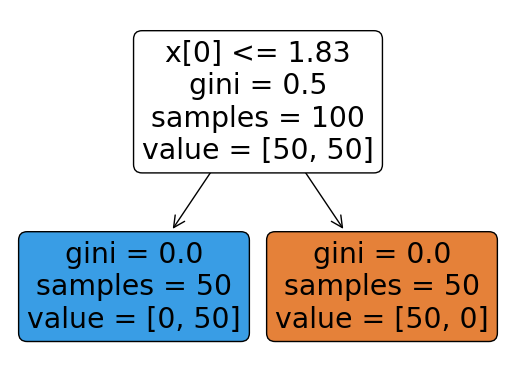

In [31]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x,y)

tree.plot_tree(tree_clf, filled=True, rounded=True)
plt.show()

The resulting tree is really simple, as it is the clasification boundary:

C:\Users\javic\AppData\Local\Temp\ipykernel_16804\3773534933.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


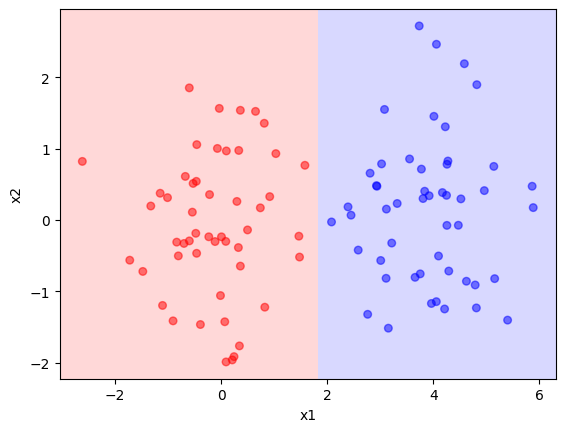

In [32]:
visualize_classifier(tree_clf,x,y)

Ahora, podemos rotar los atributos en el espacio. Si bien esto puede parecer, en principio, raro, veremos más adelante que es algo completamente natural y que, de hecho, se suele hacer (de hecho, se suele hacer con el objetivo contrario al que lo haremos nosotros).

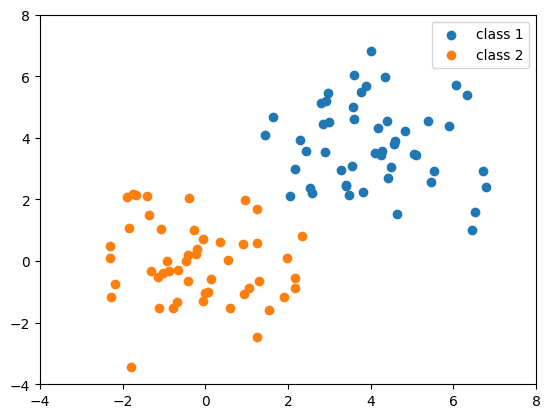

In [33]:
x_rotated = np.zeros(x.shape)
x_rotated[:,0] = x[:,0]+x[:,1]
x_rotated[:,1] = x[:,0]-x[:,1]

plt.scatter(x_rotated[y==0][:,0], x_rotated[y==0][:,1], label='class 1')
plt.scatter(x_rotated[y==1][:,0], x_rotated[y==1][:,1], label='class 2')

plt.xlim(-4,8)
plt.ylim(-4,8)

plt.legend()
plt.show()

Ahora, el conjunto de datos sigue siendo linealmente separable, pero la frontera de decisión ya no está alineada con ninguno de los atributos. Veamos el árbol de decisión resultante.

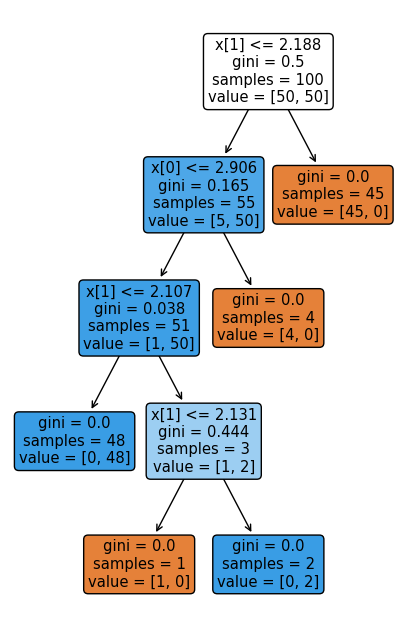

In [34]:
rotated_tree_clf = DecisionTreeClassifier()
rotated_tree_clf.fit(x_rotated,y)

plt.figure(figsize=(5,8))
tree.plot_tree(rotated_tree_clf, filled=True, rounded=True)
plt.show()

Que arroja la siguiente frontera de decisión.

C:\Users\javic\AppData\Local\Temp\ipykernel_16804\3773534933.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


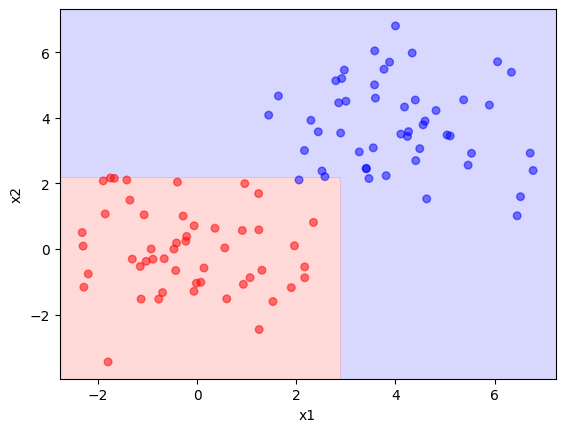

In [35]:
visualize_classifier(rotated_tree_clf,x_rotated,y)

**Como podemos ver, es mucho más difícil para un Árbol de Decisión aprender regiones que no están alineadas con los atributos.**

## Extras: Cálculo de Impureza y Ganancia Gini

Ahora vamos a calcular cuán buena es la *pregunta* del género y clase del Titanic para separar las muestras usando la impureza Gini. Para ello:

**Ejercicio:** calcula la impureza inicial del dataset. Ayuda: recuerda que en la variable `y` ya separaste las etiquetas. Si es un objeto de Pandas, tal vez la función `value_counts()` puede ser útil.

Por las dudas, volvemos a cargar el dataset y definir la variables `x` e `y`.

In [38]:
import pandas as pd
df = pd.read_csv("../../datasets/IAA_Guia_6_Titanic.csv")
X = df.drop("Survived", axis=1)
y = df.Survived

In [ ]:
muestras_neg, muestras_pos = y.value_counts()
N = y.size
gini_inicial = COMPLETAR

In [ ]:
print(gini_inicial)

**Ejercicio:** calcula la impureza Gini luego de separar por el género. Recuerden que tienen que calcular la impureza en dos hojas - una correspondiente a género masculino y otra al femenino - y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear una máscara y reciclar código anterior.

In [ ]:
mascara = df.Sex == 1
y_female = y[mascara]
y_male = y[~mascara]

In [ ]:
COMPLETAR

In [ ]:
COMPLETAR

In [ ]:
print('Impureza Gini al separar por Genero:',(y_female.size*COMPLETAR + y_male.size*COMPLETAR)/y.size)

**Ejercicio Opcional:** calcula la impureza Gini luego de separar por clase. Recuerden que tienen que calcular la impureza en tres hojas y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear tres máscaras y reciclar código anterior.

In [ ]:
mascara = df.Pclass == 1
y_1 = y[mascara]

In [ ]:
COMPLETAR

In [ ]:
mascara = df.Pclass == 2
COMPLETAR

In [ ]:
COMPLETAR

In [ ]:
mascara = df.Pclass == 3
COMPLETAR

In [ ]:
COMPLETAR

In [ ]:
print('Impureza Gini al separar por clase:', COMPLETAR)

**¿Cuál tiene una mayor ganancia Gini?¿Concuerda con lo visto hasta ahora?**

**Para pensar:** ¿cómo modificarías el código para calcular la ganancia Gini al separar por edad? Por ejemplo, al separar por mayor de 12 años y menor de 12 años.


# Formulario de Asistencia

Obligatorio completar antes del Miercoles 3 de Mayo a las 23:59
https://forms.gle/y73u31jTmXtZyMsR8